# Cool Time Series Libraries in Python

A lot of time series has been very well studied, so there are some good off-the-shelf packages that will just do damn could time series predictions/forecasting for you.  Here are a couple.

## Facebook Prophet

Find it here: https://facebook.github.io/prophet/

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('multiTimeline.csv')

In [3]:
df['date'] = pd.to_datetime(df.date)

In [4]:
df_python = df.iloc[:, 0:2].dropna()
df_python.columns = ['ds', 'y']
df_r = df[['date', 'r']].dropna()
df_r.columns = ['ds', 'y']

In [5]:
from fbprophet import Prophet

In [6]:
model_python = Prophet()
model_python.fit(df_python)
model_r = Prophet()
model_r.fit(df_r)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
future_python = model_python.make_future_dataframe(periods=365)
future_r = model_r.make_future_dataframe(periods=365)

In [8]:
forecast_python = model_python.predict(future_python)
forecast_r = model_r.predict(future_r)

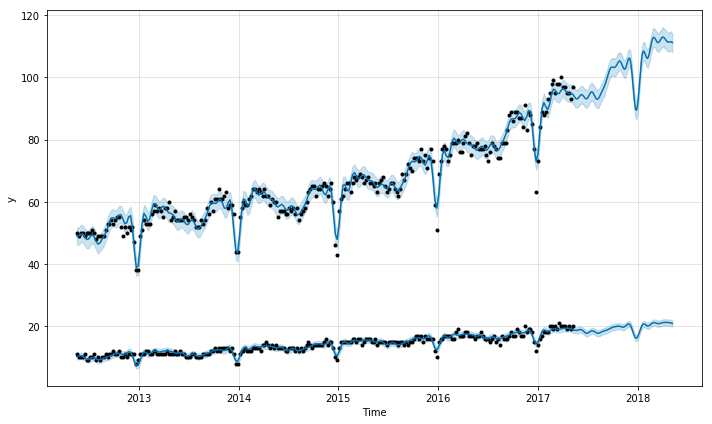

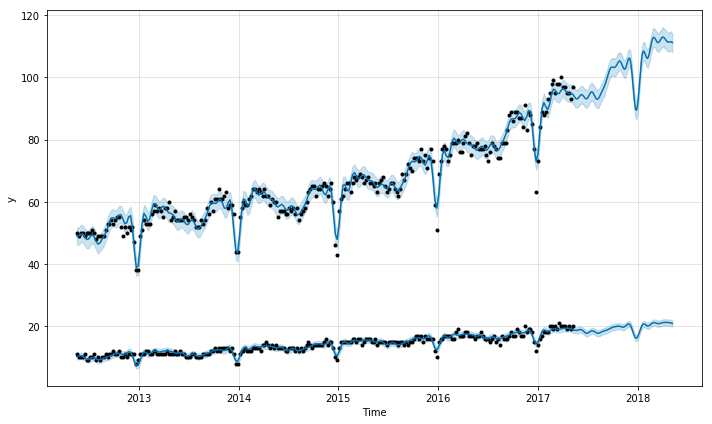

In [9]:
fig = model_python.plot(forecast_python)
model_r.plot(forecast_r, ax=fig.axes[0], xlabel='Time')

## PyFlux  

Find it here: http://www.pyflux.com/

In [10]:
import pyflux as pf

First we'll see how to pull out autocorrelation and partial autocorrelational plots using statsmodels - these are very important for helping to choose ARIMA model parameters!

In [11]:
# define helper plot function for visualing ACF and PACF plots
import seaborn as sns
import statsmodels.tsa.api as smt

def plots(data, lags=None):
    
    plt.figure(figsize=(8,4))
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    data.plot(ax=raw)
    smt.graphics.plot_acf(data, lags=lags, ax=acf)
    smt.graphics.plot_pacf(data, lags=lags, ax=pacf)
    sns.despine()
    plt.tight_layout()

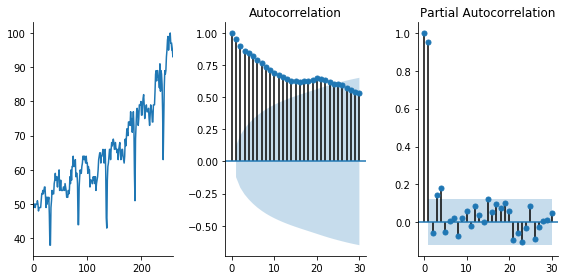

In [12]:
plots(df_python.y, lags=30)

The PACF plot suggests that we may want to use an AR(2) model, since the other first 30 lags have small or statistically insignificant PACF.

In [13]:
# Instantiate ARIMA model, we could include additional features in the "formula" parameter if we had them
model = pf.ARIMAX(data=df_python,formula='y~1',ar=2,ma=0, integ=0)
fit_model = model.fit()
fit_model.summary()

Normal ARIMAX(2,0,0)                                                                                      
======================================================= ==================================================
Dependent Variable: y                                   Method: MLE                                       
Start Date: 2                                           Log Likelihood: -690.8166                         
End Date: 259                                           AIC: 1389.6332                                    
Number of observations: 258                             BIC: 1403.8451                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    1.0546     0.0622     16.9539  0.0      (0.9327 | 1.1766)        
AR(2)                                

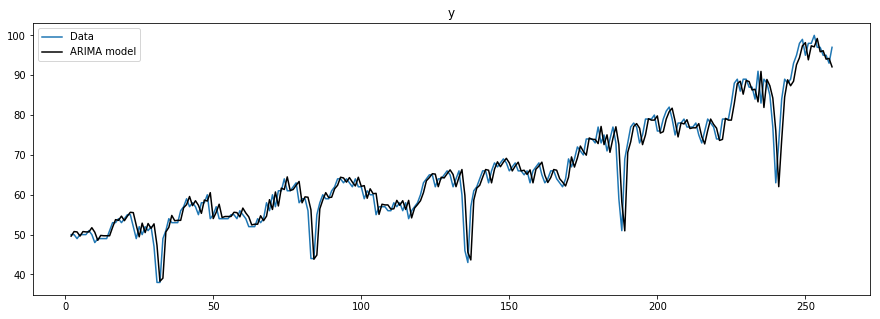

In [14]:
# Plot the model results
model.plot_fit(figsize=(15,5))

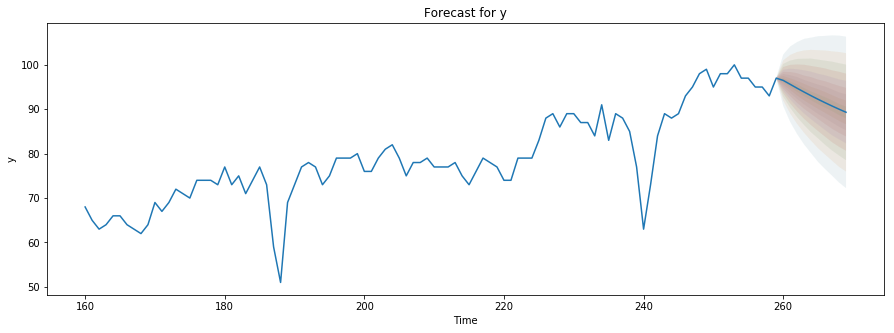

In [15]:
# Forecast going forward!
model.plot_predict(h=10,oos_data=df_python.iloc[-12:],past_values=100,figsize=(15,5))